In [348]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import nltk
import math

In [349]:
def conv_to_char(n):
    s = list(n)
    st = ""
    for i in s:
        st += chr(i)
    return st

In [350]:
def features_of_images_train_val(location_folder):
    
    list_of_files = os.listdir(location_folder)
    
    full_file_path = []
    for i in list_of_files:
        full_file_path.append(location_folder+i)

    id = []
    cls = []
    image = []

    for i in full_file_path:
        raw_img = tf.data.TFRecordDataset(i)
        image_description = {
            "id" : tf.io.FixedLenFeature([],tf.string),
            "class": tf.io.FixedLenFeature([],tf.int64),
            "image": tf.io.FixedLenFeature([],tf.string)
        }
        y = lambda x: tf.io.parse_single_example(x,image_description)
        img = raw_img.map(y)

        begin = i.rindex("-")+1
        end = i.index(".tfrec")
        num = int(i[begin:end])

        for dr in img.take(num):
            id.append(conv_to_char(dr["id"].numpy()))
            cls.append(int(dr["class"].numpy()))
            image.append(tf.io.decode_image(dr["image"]).numpy())
    
    return id,cls,image

In [351]:
def features_of_images_test(location_folder):

    list_of_files = os.listdir(location_folder)

    full_file_path = []
    for i in list_of_files:
        full_file_path.append(location_folder+i)

    id = []
    image = []

    for i in full_file_path:
        raw_img = tf.data.TFRecordDataset(i)
        image_description = {
            "id" : tf.io.FixedLenFeature([],tf.string),
            "image": tf.io.FixedLenFeature([],tf.string)
        }
        y = lambda x: tf.io.parse_single_example(x,image_description)
        img = raw_img.map(y)

        begin = i.rindex("-")+1
        end = i.index(".tfrec")
        num = int(i[begin:end])

        for dr in img.take(num):
            id.append(conv_to_char(dr["id"].numpy()))
            image.append(tf.io.decode_image(dr["image"]).numpy())

    return id,image

In [352]:
location_folder_train_192 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-192x192/train/"

location_folder_train_224 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-224x224/train/"

location_folder_train_331 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-331x331/train/"

location_folder_train_512 = "/Users/amith/Documents/GitHub/kaggle/Petals to the Metal - Flower Classification on TPU/tpu-getting-started/tfrecords-jpeg-512x512/train/"

In [353]:
id_train_192,cls_train_192,image_train_192 = features_of_images_train_val(location_folder_train_192)

In [354]:
id_train_224,cls_train_224,image_train_224 = features_of_images_train_val(location_folder_train_224)

In [355]:
id_train_331,cls_train_331,image_train_331 = features_of_images_train_val(location_folder_train_331)

In [356]:
id_train_512,cls_train_512,image_train_512 = features_of_images_train_val(location_folder_train_512)

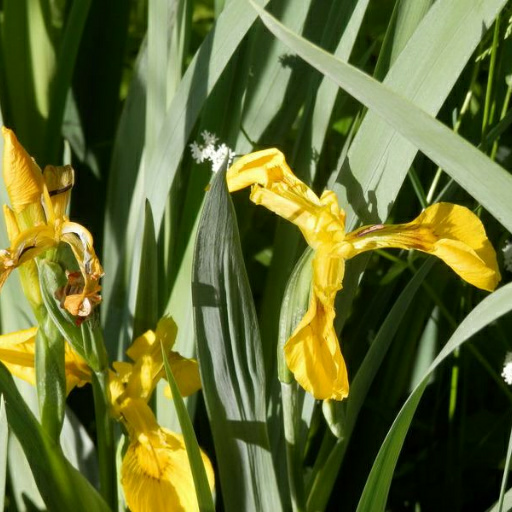

In [357]:
tf.keras.utils.array_to_img(image_train_512[0])